In [49]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Learning goals**:

1. Learn how to format your output with `format()` and placeholders.
2. Discuss `for` loops and `while` statements.
3. Discuss how to plot figures using Matplotlib.

# Formatted Output

There are different ways to output and print your results in Python. So far we have used the `print()` function and placed text and variables to be printed inside the parenthesis.

In [50]:
lab_number = 4
print("This is Lab",lab_number)

This is Lab 4


Another way to generate the printed outputs is with `format()`. The `format()` function formats the specified value and insert them inside the string's placeholder. The placeholder is defined using curly brackets: `{}`. The placeholders can be identified using named indexes `{object_name}`, numbered indexes `{0}`, or even empty placeholders `{}`.

In [51]:
#Using named index as placeholder
print("This is Lab {lab_number}".format(lab_number=4))

This is Lab 4


In [52]:
#Using a numbered index as placeholder
print("This is Lab {0}".format(4))

This is Lab 4


In [53]:
#Assigning a name to the string
txt = "This is Lab {lab_number}"
print(txt.format(lab_number=4))

This is Lab 4


When working with non integer number you may want to format your object to change number of decimals values that are displayed.
For example say you want to find what percentage of total U.S. installed capacity comes from wind using the PLNT20 tab.

In [54]:
#Import data
import pandas as pd
egrid=pd.read_excel("egrid2020_data.xlsx",sheet_name="PLNT20",skiprows=1,keep_default_na=False)

In [55]:
#convert namepcap to numeric so we can calculate sum
egrid.NAMEPCAP = pd.to_numeric(egrid.NAMEPCAP)

#find total installed capacity
total_cap = egrid.NAMEPCAP.sum()

#filter for wind
egrid_sub = egrid[(egrid.PLFUELCT=="WIND")]

#find total installed capacity for wind
total_wind = egrid_sub.NAMEPCAP.sum()

#Calculate percentage
pct_wind = total_wind / total_cap

#Print results using placeholders and string
print(total_cap,total_wind,pct_wind)

1656187.7000000002 164975.2 0.09961141481729395


How can we make this print look better?

In [56]:
print("US Total Installed Capacity is:",total_cap)
print("US Total Wind Installed Capacity is:",total_wind)
print("Share of Wind is:",pct_wind)

US Total Installed Capacity is: 1656187.7000000002
US Total Wind Installed Capacity is: 164975.2
Share of Wind is: 0.09961141481729395


You don't need your code to display all this decimal values, if you want to round to 2 decimal points you can use the format `%.2f`. The `%` refers to formatting, the `f` corresponds to float and `.2` means you want the first two decimal values to be displayed.

In [57]:
print("US Total Installed Capacity is: %.2f" % total_cap)
print("US Total Wind Installed Capacity is: %.2f" % total_wind)
print("Share of Wind is: %.2f" % pct_wind)

US Total Installed Capacity is: 1656187.70
US Total Wind Installed Capacity is: 164975.20
Share of Wind is: 0.10


You could also use `format()` and placevalue with `.2f` by adding a collon `:` inside the placeholder bracket.

In [58]:
print("US total installed capacity is {0:.0f} MW. \nThe total wind power installed capacity is {1:.0f} MW. \nWind represents {2:0.02f}% of total US installed capacity".format(total_cap,total_wind,pct_wind))


US total installed capacity is 1656188 MW. 
The total wind power installed capacity is 164975 MW. 
Wind represents 0.10% of total US installed capacity


# Loop FOR, loop WHILE and IF statements in Python

## FOR loops

Loops are used when we need to iterate over an index or a range and perform action on each index.

The structure of a for loop is the following:

```
for counter in set/range:
  statements
  ...
```

Some simple examples:

In [59]:
classes = ["ENV716","ENV710","ENV520","ENV711"]
print(classes)

['ENV716', 'ENV710', 'ENV520', 'ENV711']


In [60]:
for i in classes:
    print(i)

ENV716
ENV710
ENV520
ENV711


In [61]:
for letter in "Dimitris":
    print(letter)

D
i
m
i
t
r
i
s


In [62]:
for i in 1,2,3,4:
    print(i)

1
2
3
4


In [63]:
for i in range(1,11):
    print(i)

1
2
3
4
5
6
7
8
9
10


In [64]:
for i in range(1,100,10):
    print(i)

1
11
21
31
41
51
61
71
81
91


In [65]:
a = [10,20,30,40,50,60,70,80]
a_sum=0
count=0
for i in a:
    a_sum = a_sum + i
    count = count + 1
    print(a_sum)
print('Sum of elements is',a_sum)
print('Number of elements is',count)
avg = a_sum / count
print('Average is',avg)

10
30
60
100
150
210
280
360
Sum of elements is 360
Number of elements is 8
Average is 45.0


In [66]:
#average of elements less than 50
a = [10,20,30,40,50,60,70,80]
a_sum=0
count=0
for i in a:
    if i < 50:
        a_sum = a_sum + i
        count = count + 1
        print(a_sum)
print('Sum of elements is',a_sum)
print('Number of elements is',count)
avg = a_sum / count
print('Average is',avg)

10
30
60
100
Sum of elements is 100
Number of elements is 4
Average is 25.0


### Check if a given number is a prime number

In [67]:
# Function to check if a number is prime
def is_prime(number):
  if number <= 1:
    return False  # 0 and 1 are not prime numbers
  if number <= 3:
    return True   # 2 and 3 are prime numbers

  # Check for divisibility from 2 to the square root of the number
  for i in range(2, int(number**0.5) + 1):
    if number % i == 0:
      return False  # If the number is divisible, it's not prime

  return True  # If no divisors were found, the number is prime


In [68]:
is_prime(11)

True

In [69]:
is_prime(78)

False

## WHILE loops

While loops are used to repeat a section of a code an unknown number of times, until a specific condition is met.

The structure of a while loop is the following:


```
while condition:
  statements
  ...
```



In [70]:
i = 50
while i <= 60:
    print(i)
    i = i + 1

50
51
52
53
54
55
56
57
58
59
60


The next example generates random numbers until it finds one that is divisible by both 2 and 3. Since we do not know how many iterations are neede, a `while` loop is a good choice.

In [71]:
import random

cnt = 0

while True:
  # Generate a random number between 1 and 100
  number = random.randint(1, 100)
  cnt += 1
  # Check if the number is divisible by both 2 and 3
  if number % 2 == 0 and number % 3 == 0:
    print(f"Found a number divisible by both 2 and 3 in {cnt} iterations: {number}")
    break

Found a number divisible by both 2 and 3 in 4 iterations: 60


# Plotting with Matplotlib

Matplotlib is a powerful and widely used Python library for creating static, animated, and interactive visualizations. It provides a flexible and intuitive interface for generating various plots and charts. Its versatility extends to customization, allowing users to tailor the appearance of their plots to suit specific needs. Matplotlib's extensive capabilities, along with its integration with other data manipulation libraries like NumPy and Pandas, make it a fundamental component of the Python ecosystem for data visualization and exploration.

We first need to import the `matplotlib` package.

In [72]:
# Importing Matplotlib
import matplotlib.pyplot as plt

## Line plots

In the following code block we create a basic line plot.
- We define two lists `x` and `y` as sample data points for the x-axis and y-axis, respectively.
- The `plt.plot(x, y)` line creates a basic line plot using the plot function.
- We use `plt.xlabel`, `plt.ylabel`, and `plt.title` to add labels and a title to the plot.
- Finally, `plt.show()` is called to display the plot.

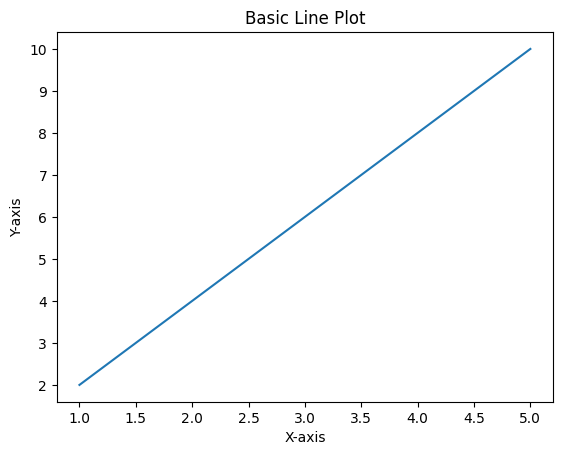

In [73]:
# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Create a basic line plot
plt.plot(x, y)

# Adding labels and a title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Basic Line Plot")

# Display the plot
plt.show()

## Scatter plots

In the following code block we create a scatter plot.

- We import Matplotlib using `import matplotlib.pyplot as plt`.
- We define two lists, `x` and `y`, as sample data points for the x-axis and y-axis, respectively.
- The `plt.scatter(x, y, color='red', label='Data Points')` line creates a scatter plot using the `scatter` function. We specify the color of the data points as red and provide a label for the legend.
- We use `plt.xlabel`, `plt.ylabel`, and `plt.title` to add labels and a title to the plot.
- `plt.legend()` is called to display the legend with the label we provided.
- Finally, `plt.show()` is used to display the scatter plot.

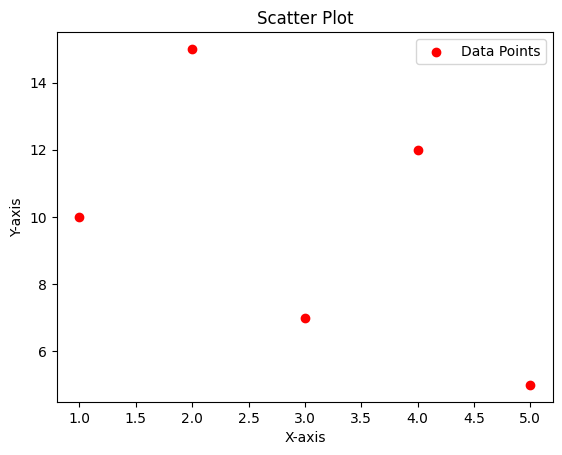

In [74]:
# Sample data
x = [1, 2, 3, 4, 5]
y = [10, 15, 7, 12, 5]

# Create a scatter plot
plt.scatter(x, y, color='red', label='Data Points')

# Adding labels and a title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot")

# Adding a legend
plt.legend()

# Display the plot
plt.show()

## Bar chart

In the following code block we create a bar chart.

- We define two lists: `categories` for the category labels and `values` for the corresponding values.
- The `plt.bar(categories, values, color=['blue', 'green', 'orange'])` line creates a bar chart using the `bar` function. We specify the categories, values, and colors for the bars.
- We add labels to the x-axis and y-axis using `plt.xlabel` and `plt.ylabel`, respectively.
- A title is added to the plot using `plt.title`.
- Finally, `plt.show()` is used to display the bar chart.

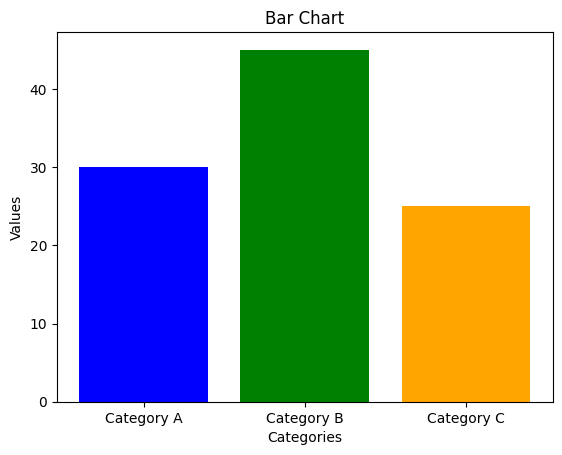

In [75]:
# Sample data
categories = ['Category A', 'Category B', 'Category C']
values = [30, 45, 25]

# Create a bar chart
plt.bar(categories, values, color=['blue', 'green', 'orange'])

# Adding labels and a title
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Bar Chart")

# Display the plot
plt.show()

## Pie chart

In the following code block we create a pie chart.
- We define the sample data:
  - `labels` contains the category labels.
  - `sizes` contains the corresponding values for each category.
  - `colors` specifies the colors for each slice.
  - `explode` is a tuple that allows you to "explode" a slice (in this case, the second slice, Category B).
- The `plt.pie()` function is used to create the pie chart. We provide the sizes, labels, colors, explode parameter, and `autopct` to display percentage values on the chart.
- We add a title to the plot using `plt.title`.
- `plt.axis('equal')` ensures that the pie chart is drawn as a circle.
- Finally, `plt.show()` is used to display the pie chart.

In [ ]:
# Sample data
labels = ['Category A', 'Category B', 'Category C']
sizes = [30, 45, 25]
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0, 0.1, 0)  # To explode the second slice (Category B)

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True)

# Adding a title
plt.title("Pie Chart")

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

## Histogram

In the following code block we create a histogram.

- We import the Matplotlib library using `import matplotlib.pyplot as plt`.
- We define the sample data in the `data` list.
- The `plt.hist(data, bins=5, color='purple', alpha=0.7, edgecolor='black')` line creates a histogram using the `hist` function. We specify the data, number of bins (in this case, 5), color, transparency (alpha), and edgecolor for the bars.
- We add labels to the x-axis and y-axis using `plt.xlabel` and `plt.ylabel`, respectively.
- A title is added to the plot using `plt.title`.
- Finally, `plt.show()` is used to display the histogram.

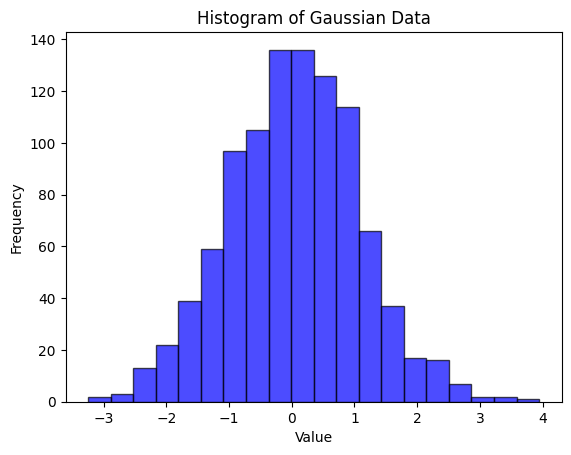

In [76]:
# Generate data from a Gaussian distribution with mean 0 and standard deviation 1
data = np.random.normal(0, 1, 1000)

# Create a histogram
plt.hist(data, bins=20, color='blue', alpha=0.7, edgecolor='black')

# Adding labels and a title
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Gaussian Data")

# Display the plot
plt.show()

## Exercise: eGRID 2021

Present a histogram that shows the total number of generators that came online in year 2020 by generator type.

In [77]:
import pandas as pd
import numpy as np

df_gen21 = pd.read_excel(io="eGRID2021_data.xlsx",sheet_name="GEN21",skiprows=1,keep_default_na=False)
df_plant21 = pd.read_excel(io="eGRID2021_data.xlsx",sheet_name="PLNT21",skiprows=1,keep_default_na=False)

sub_egrid_gen = df_gen21.loc[:,["ORISPL", "GENYRONL"]]
sub_egrid_plant=df_plant21.loc[:,['ORISPL','PSTATABB','PNAME','PLFUELCT']]

In [78]:
merged_inner = pd.merge(sub_egrid_gen, sub_egrid_plant,on="ORISPL")

In [79]:
sub_merged=merged_inner[ merged_inner.GENYRONL == 2020 ]
sub_merged.head()

,ORISPL,GENYRONL,PSTATABB,PNAME,PLFUELCT
7,60243,2020,AK,Ambler,OIL
258,6304,2020,AK,Kotzebue Hybrid,OIL
259,6304,2020,AK,Kotzebue Hybrid,OIL
260,6304,2020,AK,Kotzebue Hybrid,OIL
261,6304,2020,AK,Kotzebue Hybrid,OIL


In [80]:
cnts = sub_merged.groupby( "PLFUELCT" )["PNAME"].count()

In [81]:
type(cnts)

pandas.core.series.Series

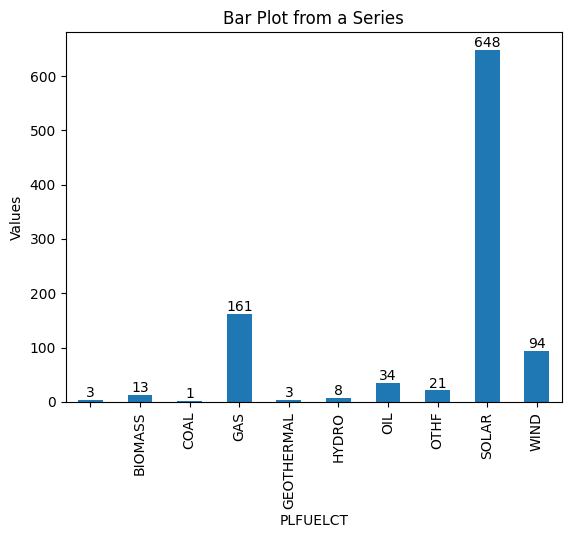

In [82]:
cnts.plot.bar()

# Adding labels and a title
plt.ylabel("Values")
plt.title("Bar Plot from a Series")

# Annotate the top of each bar with the corresponding value
for index, value in enumerate(cnts):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Display the plot
plt.show()